# A2: NeuralNetwork Class

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Requirements" data-toc-modified-id="Requirements-1">Requirements</a></span></li><li><span><a href="#Code-for-NeuralNetwork-Class" data-toc-modified-id="Code-for-NeuralNetwork-Class-2">Code for <code>NeuralNetwork</code> Class</a></span></li><li><span><a href="#Example-Results" data-toc-modified-id="Example-Results-3">Example Results</a></span></li><li><span><a href="#Application-to-Boston-Housing-Data" data-toc-modified-id="Application-to-Boston-Housing-Data-4">Application to Boston Housing Data</a></span></li></ul></div>

## Requirements

In this assignment, you will complete the implementation of the `NeuralNetwork` class, starting with the code included in the next code cell.  Your implementation must meet the requirements described in the doc-strings.

Download [optimizers.tar](https://www.cs.colostate.edu/~anderson/cs545/notebooks/optimizers.tar) and extract `optimizers.py` for use in this assignment.

Then apply your `NeuralNetwork` class to the problem of predicting the value of houses in Boston as described below.

## Code for `NeuralNetwork` Class

In [31]:
%%writefile neuralnetwork.py

import numpy as np
import optimizers as opt


class NeuralNetwork():
    """
    A class that represents a neural network for nonlinear regression

    Attributes
    ----------
    n_inputs : int
        The number of values in each sample
    n_hidden_units_by_layers: list of ints, or empty
        The number of units in each hidden layer.
        Its length specifies the number of hidden layers.
    n_outputs: int
        The number of units in output layer
    all_weights : one-dimensional numpy array
        Contains all weights of the network as a vector
    Ws : list of two-dimensional numpy arrays
        Contains matrices of weights in each layer,
        as views into all_weights
    all_gradients : one-dimensional numpy array
        Contains all gradients of mean square error with
        respect to each weight in the network as a vector
    Grads : list of two-dimensional numpy arrays
        Contains matrices of gradients weights in each layer,
        as views into all_gradients
    total_epochs : int
        Total number of epochs trained so far
    error_trace : list
        Mean square error (standardized) after each epoch
    X_means : one-dimensional numpy array
        Means of the components, or features, across samples
    X_stds : one-dimensional numpy array
        Standard deviations of the components, or features, across samples
    T_means : one-dimensional numpy array
        Means of the components of the targets, across samples
    T_stds : one-dimensional numpy array
        Standard deviations of the components of the targets, across samples
        
    Methods
    -------
    make_weights_and_views(shapes)
        Creates all initial weights and views for each layer

    train(X, T, n_epochs, method='sgd', learning_rate=None, verbose=True)
        Trains the network using samples by rows in X and T

    use(X)
        Applies network to inputs X and returns network's output
    """

    def __init__(self, n_inputs, n_hidden_units_by_layers, n_outputs):
        
        """Creates a neural network with the given structure

        Parameters
        ----------
        n_inputs : int
            The number of values in each sample
        n_hidden_units_by_layers : list of ints, or empty
            The number of units in each hidden layer.
            Its length specifies the number of hidden layers.
        n_outputs : int
            The number of units in output layer
        

        Returns
        -------
        NeuralNetwork object
        """
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.n_hidden_units_by_layers=n_hidden_units_by_layers

        # Assign attribute values. Set self.X_means to None to indicate
        # that standardization parameters have not been calculated.
        # ....
        self.total_epochs = 0
        self.error_trace = []
        self.X_means = None
        self.X_stds = None
        self.T_means = None
        self.T_stds = None
        
        # Build list of shapes for weight matrices in each layer
        # ...
        shapes = []
        inp_shape = n_inputs
        for i in range(0, len(self.n_hidden_units_by_layers)):
            shapes.append([inp_shape+1,n_hidden_units_by_layers[i]])
            inp_shape = n_hidden_units_by_layers[i]

        shapes.append([inp_shape+1,n_outputs])
        print("shsape :",shapes)
        # Call make_weights_and_views to create all_weights and Ws
        # ...
        self.all_weights, self.Ws = self.make_weights_and_views(shapes)
        
        # Call make_weights_and_views to create all_gradients and Grads
        # ...
        self.all_gradients, self.Grads = self.make_weights_and_views(shapes)

    def make_weights_and_views(self, shapes):
        """Creates vector of all weights and views for each layer

        Parameters
        ----------
        shapes : list of pairs of ints
            Each pair is number of rows and columns of weights in each layer

        Returns
        -------
        Vector of all weights, and list of views into this vector for each layer
        """

        # Create one-dimensional numpy array of all weights with random initial values
        #  ...
        all_weights_size = 0
        for shape in shapes:
            all_weights_size += shape[0]*shape[1]

        print("al wright size :", all_weights_size)
        all_weights = np.random.uniform(-1, 1, size=(all_weights_size))
        

        # Build list of views by reshaping corresponding elements
        # from vector of all weights into correct shape for each layer.        
        # ...
        views = []
        start = 0
        for shape in shapes:
            size =shape[0] * shape[1]
            views.append(all_weights[start:start + size].reshape(shape))
            start += size
            
        return all_weights, views
    def __repr__(self):
        return f'NeuralNetwork({self.n_inputs}, ' + \
            f'{self.n_hidden_units_by_layers}, {self.n_outputs})'

    def __str__(self):
        s = self.__repr__()
        if self.total_epochs > 0:
            s += f'\n Trained for {self.total_epochs} epochs.'
            s += f'\n Final standardized training error {self.error_trace[-1]:.4g}.'
        return s
 
    def train(self, X, T, n_epochs, method='sgd', learning_rate=None, verbose=True):
        
        """Updates the weights 

        Parameters
        ----------
        X : two-dimensional numpy array
            number of samples  x  number of input components
        T : two-dimensional numpy array
            number of samples  x  number of output components
        n_epochs : int
            Number of passes to take through all samples
        method : str
            'sgd', 'adam', or 'scg'
        learning_rate : float
            Controls the step size of each update, only for sgd and adam
        verbose: boolean
            If True, progress is shown with print statements
        """
        print("....................... ............................. IN TRAIN ..............")
        # Calculate and assign standardization parameters
        # ...
        self.X_means = X.mean(axis=0)
        #print(" X : ", X)
        #print("X_means",X.mean(axis=0) )
        #print("X_means :",self.X_means)
        self.X_stds = X.std(axis=0)
        #print("X_stds :",X_stds)
        #self.X_stds[self.X_stds == 0] = 1
        self.T_means = T.mean(axis=0)
        #print("T_means :",T_means)
        self.T_stds = T.std(axis=0)
        #print("T_stds :",T_stds)
        print("self.X_means :",self.X_means, "self.X_stds :",self.X_stds, "self.T_means :",self.T_means, "self.T_stds :",self.T_stds)
        # Standardize X and T
        # ...
        X = (X - self.X_means) / self.X_stds
        T = (T - self.T_means) / self.T_stds
        # Instantiate Optimizers object by giving it vector of all weights
        optimizer = opt.Optimizers(self.all_weights)

        error_convert_f = lambda err: (np.sqrt(err) * self.T_stds)[0]
        
        # Call the requested optimizer method to train the weights.

        if method == 'sgd':

            # ...
            error_trace = optimizer.sgd(self.error_f, self.gradient_f,fargs=[X, T], n_epochs=n_epochs,
                                        learning_rate=learning_rate, 
                                        verbose=True,
                                        error_convert_f=error_convert_f)

        elif method == 'adam':

            # ...
            error_trace = optimizer.adam(self.error_f, self.gradient_f,fargs=[X, T], n_epochs=n_epochs,
                                        learning_rate=learning_rate, 
                                        verbose=True,
                                        error_convert_f=error_convert_f)

        elif method == 'scg':

            # ...
            
            error_trace = optimizer.scg(self.error_f, self.gradient_f,fargs=[X, T], n_epochs=n_epochs, 
                                        verbose=True,
                                        error_convert_f=error_convert_f)


        else:
            raise Exception("method must be 'sgd', 'adam', or 'scg'")

        self.total_epochs += len(error_trace)
        self.error_trace += error_trace

        # Return neural network object to allow applying other methods
        # after training, such as:    Y = nnet.train(X, T, 100, 0.01).use(X)

        return self

    def _forward(self, X):
        """Calculate outputs of each layer given inputs in X
        
        Parameters
        ----------
        X : input samples, standardized

        Returns
        -------
        Outputs of all layers as list
        """
        self.Ys = [X]
        # Append output of each layer to list in self.Ys, then return it.
        # ...
        for W in self.Ws[:-1]:
            self.Ys.append(np.tanh(self.Ys[-1] @ W[1:, :] + W[0:1, :]))
        self.Ys.append(self.Ys[-1] @ self.Ws[-1][1:, :] + self.Ws[-1][0:1, :])
        return self.Ys

    # Function to be minimized by optimizer method, mean squared error
    def error_f(self, X, T):
        """Calculate output of net and its mean squared error 

        Parameters
        ----------
        X : two-dimensional numpy array
            number of samples  x  number of input components
        T : two-dimensional numpy array
            number of samples  x  number of output components

        Returns
        -------
        Mean square error as scalar float that is the mean
        square error over all samples
        """
        # Call _forward, calculate mean square error and return it.
        # ...
        Ys = self._forward(X)
        mean_sq_error = np.mean((T - Ys[-1]) ** 2)
        return mean_sq_error

    # Gradient of function to be minimized for use by optimizer method
    def gradient_f(self, X, T):
        """Returns gradient wrt all weights. Assumes _forward already called.

        Parameters
        ----------
        X : two-dimensional numpy array
            number of samples  x  number of input components
        T : two-dimensional numpy array
            number of samples  x  number of output components

        Returns
        -------
        Vector of gradients of mean square error wrt all weights
        """

        # Assumes forward_pass just called with layer outputs saved in self.Ys.
        n_samples = X.shape[0]
        n_outputs = T.shape[1]
        n_layers = len(self.n_hidden_units_by_layers) + 1

        # D is delta matrix to be back propagated
        D = -(T - self.Ys[-1]) / (n_samples * n_outputs)

        # Step backwards through the layers to back-propagate the error (D)
        for layeri in range(n_layers - 1, -1, -1):
            # gradient of all but bias weights
            self.Grads[layeri][1:, :] =  self.Ys[layeri].T @ D
            # gradient of just the bias weights
            self.Grads[layeri][0:1, :] = np.sum(D, axis=0)
            # Back-propagate this layer's delta to previous layer
            if layeri > 0:
                D = D @ self.Ws[layeri][1:, :].T * (1 - self.Ys[layeri] ** 2)

        return self.all_gradients

    def use(self, X):
        """Return the output of the network for input samples as rows in X

        Parameters
        ----------
        X : two-dimensional numpy array
            number of samples  x  number of input components, unstandardized

        Returns
        -------
        Output of neural network, unstandardized, as numpy array
        of shape  number of samples  x  number of outputs
        """

        # Standardize X
        # ...
        X = (X - self.X_means) / self.X_stds
        Ys = self._forward(X)
        Y = Ys[-1]
        # Unstandardize output Y before returning it
        return Y * self.T_stds + self.T_means

    def get_error_trace(self):
        """Returns list of standardized mean square error for each epoch"""
        return self.error_trace

Writing neuralnetwork.py


## Example Results

Here we test the `NeuralNetwork` class with some simple data.  



method is sgd and rho is 0.01

shsape : [[2, 2], [3, 2], [3, 1]]
al wright size : 13
al wright size : 13
....................... ............................. IN TRAIN ..............
self.X_means : [-1.9] self.X_stds : [0.07071068] self.T_means : [0.09478489] self.T_stds : [0.56991391]
sgd: Epoch 1 ObjectiveF=0.56994
sgd: Epoch 2 ObjectiveF=0.56994
sgd: Epoch 3 ObjectiveF=0.56994
sgd: Epoch 4 ObjectiveF=0.56994
sgd: Epoch 5 ObjectiveF=0.56994
sgd: Epoch 6 ObjectiveF=0.56994
sgd: Epoch 7 ObjectiveF=0.56993
sgd: Epoch 8 ObjectiveF=0.56993
sgd: Epoch 9 ObjectiveF=0.56993
sgd: Epoch 10 ObjectiveF=0.56993

method is adam and rho is 0.005

shsape : [[2, 2], [3, 2], [3, 1]]
al wright size : 13
al wright size : 13
....................... ............................. IN TRAIN ..............
self.X_means : [-1.9] self.X_stds : [0.07071068] self.T_means : [0.09478489] self.T_stds : [0.56991391]
Adam: Epoch 1 ObjectiveF=0.56994
Adam: Epoch 2 ObjectiveF=0.56992
Adam: Epoch 3 ObjectiveF=0.56991
Ad

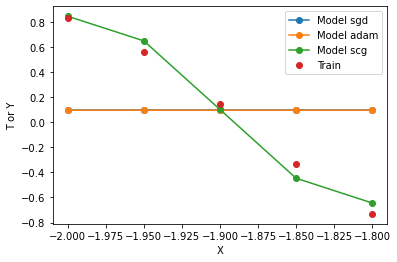

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import neuralnetwork as nn

X = np.arange(-2, 2, 0.05).reshape(-1, 1)
T = np.sin(X) * np.sin(X * 10)

# Just use first 5 samples
X = X[:5, :]
T = T[:5, :]

errors = []
# n_epochs = 1000
n_epochs = 10

method_rhos = [('sgd', 0.01),
               ('adam', 0.005),
               ('scg', None)]

for method, rho in method_rhos:
    
    print('\n=========================================')
    print(f'method is {method} and rho is {rho}')
    print('=========================================\n')

    nnet = nn.NeuralNetwork(X.shape[1], [2, 2], 1)
    
    # Set all weights here to allow comparison of your calculations
    # Must use [:] to overwrite values in all_weights.
    # Without [:], new array is assigned to self.all_weights, so self.Ws no longer refer to same memory
    nnet.all_weights[:] = np.arange(len(nnet.all_weights)) * 0.001
    
    nnet.train(X, T, n_epochs, method=method, learning_rate=rho)
    Y = nnet.use(X)
    plt.plot(X, Y, 'o-', label='Model ' + method)
    errors.append(nnet.get_error_trace())

plt.plot(X, T, 'o', label='Train')
plt.xlabel('X')
plt.ylabel('T or Y')
plt.legend();

shsape : [[2, 10], [11, 10], [11, 1]]
al wright size : 141
al wright size : 141
....................... ............................. IN TRAIN ..............
self.X_means : [-0.025] self.X_stds : [1.15461032] self.T_means : [-0.02031147] self.T_stds : [0.53798049]
sgd: Epoch 5000 ObjectiveF=0.39427
sgd: Epoch 10000 ObjectiveF=0.38620
sgd: Epoch 15000 ObjectiveF=0.38501
sgd: Epoch 20000 ObjectiveF=0.35588
sgd: Epoch 25000 ObjectiveF=0.34588
sgd: Epoch 30000 ObjectiveF=0.27263
sgd: Epoch 35000 ObjectiveF=0.24315
sgd: Epoch 40000 ObjectiveF=0.23524
sgd: Epoch 45000 ObjectiveF=0.23226
sgd: Epoch 50000 ObjectiveF=0.23043
shsape : [[2, 10], [11, 10], [11, 1]]
al wright size : 141
al wright size : 141
....................... ............................. IN TRAIN ..............
self.X_means : [-0.025] self.X_stds : [1.15461032] self.T_means : [-0.02031147] self.T_stds : [0.53798049]
Adam: Epoch 5000 ObjectiveF=0.35006
Adam: Epoch 10000 ObjectiveF=0.16671
Adam: Epoch 15000 ObjectiveF=0.03137
A

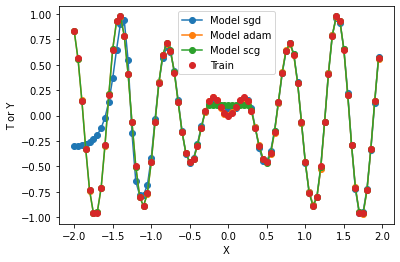

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import neuralnetwork as nn

X = np.arange(-2, 2, 0.05).reshape(-1, 1)
T = np.sin(X) * np.sin(X * 10)

errors = []
n_epochs = 1000
method_rhos = [('sgd', 0.01),
               ('adam', 0.005),
               ('scg', None)]

for method, rho in method_rhos:
    nnet = nn.NeuralNetwork(X.shape[1], [10, 10], 1)
    #print(dir(nnet))
    nnet.train(X, T, 50000, method=method, learning_rate=rho)
    Y = nnet.use(X)
    plt.plot(X, Y, 'o-', label='Model ' + method)
    errors.append(nnet.get_error_trace())

plt.plot(X, T, 'o', label='Train')
plt.xlabel('X')
plt.ylabel('T or Y')
plt.legend();

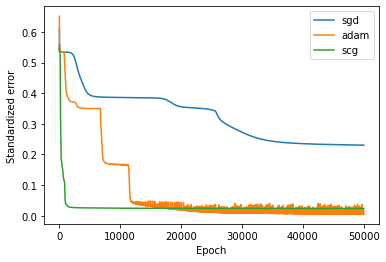

In [34]:
plt.figure(2)
plt.clf()
for error_trace in errors:
    plt.plot(error_trace)
plt.xlabel('Epoch')
plt.ylabel('Standardized error')
plt.legend([mr[0] for mr in method_rhos]);

Your results will not be the same, but your code should complete and make plots somewhat similar to these.

## Application to Boston Housing Data

Download data from [Boston House Data at Kaggle](https://www.kaggle.com/fedesoriano/the-boston-houseprice-data). Read it into python using the `pandas.read_csv` function.  Assign the first 13 columns as inputs to `X` and the final column as target values to `T`.  Make sure `T` is two-dimensional.

Before training your neural networks, partition the data into training and testing partitions, as shown here.

In [35]:
def partition(X, T, train_fraction):
    n_samples = X.shape[0]
    rows = np.arange(n_samples)
    np.random.shuffle(rows)
    
    ntrain = round(n_samples * train_fraction)
    
    Xtrain = X[rows[:ntrain], :]
    Ttrain = T[rows[:ntrain], :]
    Xtest = X[rows[ntrain:], :]
    Ttest = T[rows[ntrain:], :]
    return Xtrain, Ttrain, Xtest, Ttest
    
def rmse(T, Y):
    return np.sqrt(np.mean((T - Y)**2))

In [36]:
# Assuming you have assigned `X` and `T` correctly.
import pandas as pd
df  = pd.read_csv('boston.csv')
T = df.to_numpy()[:,-1].reshape(-1,1)
X = df.to_numpy()[:, 0:13]
print(X.shape, T.shape)
Xtrain, Ttrain, Xtest, Ttest = partition(X, T, 0.8)

(506, 13) (506, 1)


In [37]:
errors = []
n_epochs = 1000
method_rhos = [('sgd', 0.01),
               ('adam', 0.005),
               ('scg', None)]
n_hidden_units_by_layers=[10,10]

for method, rho in method_rhos:
    nnet = nn.NeuralNetwork(X.shape[1], n_hidden_units_by_layers, 1)
    #print(dir(nnet))
    nnet.train(Xtrain, Ttrain, 50000, method=method, learning_rate=rho)
    Y = nnet.use(Xtrain)
    #plt.plot(X, Y, 'o-', label='Model ' + method)
    #errors.append(nnet.get_error_trace())
    print("="*60)
    print("Rmse for Training ", method, rho,n_hidden_units_by_layers, " :",rmse(Ttrain, Y))
    YTest = nnet.use(Xtest)
    print("Rmse for Testing ", method, rho,n_hidden_units_by_layers, " :",rmse(Ttest, YTest))
    print("="*60)


shsape : [[14, 10], [11, 10], [11, 1]]
al wright size : 261
al wright size : 261
....................... ............................. IN TRAIN ..............
self.X_means : [3.62099585e+00 1.01987654e+01 1.13052593e+01 6.41975309e-02
 5.54826914e-01 6.27572593e+00 6.88098765e+01 3.76050963e+00
 9.67160494e+00 4.11177778e+02 1.85355556e+01 3.54265111e+02
 1.28171605e+01] self.X_stds : [8.58786646e+00 2.21598430e+01 6.89438682e+00 2.45104484e-01
 1.12137902e-01 7.15502949e-01 2.74340970e+01 2.08865192e+00
 8.80815047e+00 1.69937383e+02 2.11762037e+00 9.53713672e+01
 7.19621914e+00] self.T_means : [22.33753086] self.T_stds : [9.05025605]
sgd: Epoch 5000 ObjectiveF=1.93145
sgd: Epoch 10000 ObjectiveF=1.66887
sgd: Epoch 15000 ObjectiveF=1.50836
sgd: Epoch 20000 ObjectiveF=1.37423
sgd: Epoch 25000 ObjectiveF=1.28221
sgd: Epoch 30000 ObjectiveF=1.22170
sgd: Epoch 35000 ObjectiveF=1.17052
sgd: Epoch 40000 ObjectiveF=1.12535
sgd: Epoch 45000 ObjectiveF=1.08288
sgd: Epoch 50000 ObjectiveF=1.041

In [38]:
errors = []
n_epochs = 1000
method_rhos = [('sgd', 0.01),
               ('adam', 0.005),
               ('scg', None)]
n_hidden_units_by_layers = [10,10,10]

for method, rho in method_rhos:
    nnet = nn.NeuralNetwork(X.shape[1], n_hidden_units_by_layers, 1)
    #print(dir(nnet))
    nnet.train(Xtrain, Ttrain, 50000, method=method, learning_rate=rho)
    Y = nnet.use(Xtrain)
    #plt.plot(X, Y, 'o-', label='Model ' + method)
    #errors.append(nnet.get_error_trace())
    print("="*60)
    print("Rmse for Training ", method, rho,n_hidden_units_by_layers, " :",rmse(Ttrain, Y))
    YTest = nnet.use(Xtest)
    print("Rmse for Testing ", method, rho,n_hidden_units_by_layers, " :",rmse(Ttest, YTest))
    print("="*60)

# plt.plot(Xtrain, Ttrain, 'o', label='Train')
# plt.xlabel('X')
# plt.ylabel('T or Y')
# plt.legend();

shsape : [[14, 10], [11, 10], [11, 10], [11, 1]]
al wright size : 371
al wright size : 371
....................... ............................. IN TRAIN ..............
self.X_means : [3.62099585e+00 1.01987654e+01 1.13052593e+01 6.41975309e-02
 5.54826914e-01 6.27572593e+00 6.88098765e+01 3.76050963e+00
 9.67160494e+00 4.11177778e+02 1.85355556e+01 3.54265111e+02
 1.28171605e+01] self.X_stds : [8.58786646e+00 2.21598430e+01 6.89438682e+00 2.45104484e-01
 1.12137902e-01 7.15502949e-01 2.74340970e+01 2.08865192e+00
 8.80815047e+00 1.69937383e+02 2.11762037e+00 9.53713672e+01
 7.19621914e+00] self.T_means : [22.33753086] self.T_stds : [9.05025605]
sgd: Epoch 5000 ObjectiveF=1.59751
sgd: Epoch 10000 ObjectiveF=1.23017
sgd: Epoch 15000 ObjectiveF=1.07664
sgd: Epoch 20000 ObjectiveF=1.01012
sgd: Epoch 25000 ObjectiveF=0.95799
sgd: Epoch 30000 ObjectiveF=0.91012
sgd: Epoch 35000 ObjectiveF=0.86595
sgd: Epoch 40000 ObjectiveF=0.82815
sgd: Epoch 45000 ObjectiveF=0.79442
sgd: Epoch 50000 Object

In [39]:
errors = []
n_epochs = 1000
method_rhos = [('sgd', 0.01),
               ('adam', 0.005),
               ('scg', None)]
n_hidden_units_by_layers = [10]

for method, rho in method_rhos:
    nnet = nn.NeuralNetwork(X.shape[1], n_hidden_units_by_layers, 1)
    #print(dir(nnet))
    nnet.train(Xtrain, Ttrain, 50000, method=method, learning_rate=rho)
    Y = nnet.use(Xtrain)
    #plt.plot(X, Y, 'o-', label='Model ' + method)
    #errors.append(nnet.get_error_trace())
    print("="*60)
    print("Rmse for Training ", method, rho,n_hidden_units_by_layers, " :",rmse(Ttrain, Y))
    YTest = nnet.use(Xtest)
    print("Rmse for Testing ", method, rho,n_hidden_units_by_layers, " :",rmse(Ttest, YTest))
    print("="*60)

shsape : [[14, 10], [11, 1]]
al wright size : 151
al wright size : 151
....................... ............................. IN TRAIN ..............
self.X_means : [3.62099585e+00 1.01987654e+01 1.13052593e+01 6.41975309e-02
 5.54826914e-01 6.27572593e+00 6.88098765e+01 3.76050963e+00
 9.67160494e+00 4.11177778e+02 1.85355556e+01 3.54265111e+02
 1.28171605e+01] self.X_stds : [8.58786646e+00 2.21598430e+01 6.89438682e+00 2.45104484e-01
 1.12137902e-01 7.15502949e-01 2.74340970e+01 2.08865192e+00
 8.80815047e+00 1.69937383e+02 2.11762037e+00 9.53713672e+01
 7.19621914e+00] self.T_means : [22.33753086] self.T_stds : [9.05025605]
sgd: Epoch 5000 ObjectiveF=2.44061
sgd: Epoch 10000 ObjectiveF=2.18863
sgd: Epoch 15000 ObjectiveF=2.06947
sgd: Epoch 20000 ObjectiveF=1.98705
sgd: Epoch 25000 ObjectiveF=1.93975
sgd: Epoch 30000 ObjectiveF=1.90976
sgd: Epoch 35000 ObjectiveF=1.87776
sgd: Epoch 40000 ObjectiveF=1.84305
sgd: Epoch 45000 ObjectiveF=1.81463
sgd: Epoch 50000 ObjectiveF=1.78405
Rmse fo

In [40]:
errors = []
n_epochs = 1000
method_rhos = [('sgd', 0.01),
               ('adam', 0.005),
               ('scg', None)]
n_hidden_units_by_layers = [100]

for method, rho in method_rhos:
    nnet = nn.NeuralNetwork(X.shape[1], n_hidden_units_by_layers, 1)
    #print(dir(nnet))
    nnet.train(Xtrain, Ttrain, 50000, method=method, learning_rate=rho)
    Y = nnet.use(Xtrain)
    #plt.plot(X, Y, 'o-', label='Model ' + method)
    #errors.append(nnet.get_error_trace())
    print("="*60)
    print("Rmse for Training ", method, rho,n_hidden_units_by_layers, " :",rmse(Ttrain, Y))
    YTest = nnet.use(Xtest)
    print("Rmse for Testing ", method, rho,n_hidden_units_by_layers, " :",rmse(Ttest, YTest))
    print("="*60)

shsape : [[14, 100], [101, 1]]
al wright size : 1501
al wright size : 1501
....................... ............................. IN TRAIN ..............
self.X_means : [3.62099585e+00 1.01987654e+01 1.13052593e+01 6.41975309e-02
 5.54826914e-01 6.27572593e+00 6.88098765e+01 3.76050963e+00
 9.67160494e+00 4.11177778e+02 1.85355556e+01 3.54265111e+02
 1.28171605e+01] self.X_stds : [8.58786646e+00 2.21598430e+01 6.89438682e+00 2.45104484e-01
 1.12137902e-01 7.15502949e-01 2.74340970e+01 2.08865192e+00
 8.80815047e+00 1.69937383e+02 2.11762037e+00 9.53713672e+01
 7.19621914e+00] self.T_means : [22.33753086] self.T_stds : [9.05025605]
sgd: Epoch 5000 ObjectiveF=1.05428
sgd: Epoch 10000 ObjectiveF=0.75380
sgd: Epoch 15000 ObjectiveF=0.59946
sgd: Epoch 20000 ObjectiveF=0.50364
sgd: Epoch 25000 ObjectiveF=0.43599
sgd: Epoch 30000 ObjectiveF=0.38434
sgd: Epoch 35000 ObjectiveF=0.34333
sgd: Epoch 40000 ObjectiveF=0.30996
sgd: Epoch 45000 ObjectiveF=0.28236
sgd: Epoch 50000 ObjectiveF=0.25925
Rms

Write and run code using your `NeuralNetwork` class to model the Boston housing data. Experiment with all three optimization methods and a variety of neural network structures (numbers of hidden layer and units), learning rates, and numbers of epochs. Show results for at least three different network structures, learning rates, and numbers of epochs for each method.  Show your results using print statements that include the method, network structure, number of epochs, learning rate, and RMSE on training data and RMSE on testing data.

Try to find good values for the RMSE on testing data.  Discuss your results, including how good you think the RMSE values are by considering the range of house values given in the data. 

## Discusssion

This assignment was pretty interesting as I could play with different parameters of models and could see the results. I found that for all variations of models running on Boston housing data, training rmse is lower than testing rmse. I used 4 variation of models which were different by their layer size. These 4 different layer models were run on 3 oprimizers with same learning rate. When I used [10,10,10] as hidden unit by layer I found training rmse is very low but testing rmse is very high specially on SCG. It seems the model had overfitting problem specially on SCG because I found the biggest difference on scg with [10,10,10] where training rmse is  0.11 and Testing rmse is: 10.69. The lowest testing rmse is sgd 0.01 [10]  : 4.8280818014903826. The closest second one I got was adam 0.005 [10]  : 5.055136651355852. Although RMSE seems a bit high for all the models.

# Grading

Your notebook will be run and graded automatically. Test this grading process by first downloading [A2grader.tar](http://www.cs.colostate.edu/~anderson/cs545/notebooks/A2grader.tar) and extract `A2grader.py` from it. Run the code in the following cell to demonstrate an example grading session.  The remaining 20 points will be based on your discussion of this assignment.

A different, but similar, grading script will be used to grade your checked-in notebook. It will include additional tests. You should design and perform additional tests on all of your functions to be sure they run correctly before checking in your notebook.  

For the grading script to run correctly, you must first name this notebook as 'Lastname-A2.ipynb' with 'Lastname' being your last name, and then save this notebook.

In [41]:
%run -i A2grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'A2 NeuralNetwork Class Updated.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing

    import neuralnetwork as nn

    n_inputs = 3
    n_hiddens = [10, 20]
    n_outputs = 2
    n_samples = 5

    X = np.arange(n_samples * n_inputs).reshape(n_samples, n_inputs) * 0.1
    
    nnet = nn.NeuralNetwork(n_inputs, n_hiddens, n_outputs)
    nnet.all_weights = 0.1  # set all weights to 0.1
    nnet.X_means = np.mean(X, axis=0)
    nnet.X_stds = np.std(X, axis=0)
    nnet.T_means = np.zeros((n_samples, n_outputs))
    nnet.T_stds = np.ones((n_samples, n_outputs))
    
    Y = nnet.use(X)

shsape : [[4, 10], [11, 20], [21, 2]]
al wright size : 302
al wright size : 302

--- 40/40 points. Returned correct value.

Testing
    n_inputs = 3
    n_hiddens = [10, 500, 6, 3]
    n_samples = 5

    X = np.arange(n_samp

Adam: Epoch 500 ObjectiveF=0.15947
Adam: Epoch 1000 ObjectiveF=0.04067
Adam: Epoch 1500 ObjectiveF=0.01642
Adam: Epoch 2000 ObjectiveF=0.00729
Adam: Epoch 2500 ObjectiveF=0.00363
Adam: Epoch 3000 ObjectiveF=0.00324
Adam: Epoch 3500 ObjectiveF=0.00310
Adam: Epoch 4000 ObjectiveF=0.00297
Adam: Epoch 4500 ObjectiveF=0.00278
Adam: Epoch 5000 ObjectiveF=0.00286
Net 10 RMSE 0.00198
shsape : [[4, 10], [11, 500], [501, 6], [7, 3], [4, 3]]
al wright size : 8579
al wright size : 8579
....................... ............................. IN TRAIN ..............
self.X_means : [0.6 0.7 0.8] self.X_stds : [0.42426407 0.42426407 0.42426407] self.T_means : [-0.6626373  -0.41878925 -0.24647446] self.T_stds : [0.91017557 0.68788253 0.56841692]
Adam: Epoch 500 ObjectiveF=0.12802
Adam: Epoch 1000 ObjectiveF=0.10047
Adam: Epoch 1500 ObjectiveF=0.01619
Adam: Epoch 2000 ObjectiveF=0.01549
Adam: Epoch 2500 ObjectiveF=0.00673
Adam: Epoch 3000 ObjectiveF=0.03228
Adam: Epoch 3500 ObjectiveF=0.01477
Adam: Epoch 

<Figure size 432x288 with 0 Axes>

# Check-In <font color='red'>Changed Sept 14th, 8:45 AM</font>

Do not include this section in your notebook.

Name your notebook ```Lastname-A2.ipynb```.  So, for me it would be ```Anderson-A2.ipynb```.  

Combine your jupyter notebook file, your `neuralnetwork.py` file, and the `optimizers.py` file in one `tar` or `zip` file. Submit your `tar` or `zip` using the ```Assignment 2``` link on [Canvas](https://colostate.instructure.com/courses/131494).

# Extra Credit

Apply your multilayer neural network code to a regression problem using data that you choose 
from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets.php). Pick a dataset that
is listed as being appropriate for regression.